#Giriş



In [1]:
# Kullanacağım veri kümelerinin indirilmesi.
!pip install -q seaborn
# Kaggle uzerinden veri setini indirmek icin kaggle kutuphanesini sisteme indirim kuruyorum
!pip install Kaggle

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# NumPy çıktılarının daha rahat okunması için.
np.set_printoptions(precision = 3, suppress = True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.17.0


## Veri setimiz

Auto MPG veri seti, otomobillerin yakıt tüketimi (MPG - Miles Per Gallon) ile ilgili önemli bir veri kaynağıdır. Bu set, makine öğrenimi ve istatistik alanlarında sıklıkla kullanılan, klasik bir örnek veri setidir.

**Veri Setinin İçeriği**
Veri seti, genellikle aşağıdaki gibi özellikleri içerir:

- MPG: Aracın bir galon yakıtla kaç mil yol aldığını gösteren bir ölçü.
- Silindir sayısı: Motorun gücünü etkileyen bir özellik.
- Deplasman: Motorun hacmini ifade eder.
- At gücü: Motorun gücünü belirten bir ölçü.
- Ağırlık: Aracın toplam ağırlığı.
- Hızlanma: 0'dan 60 mil/saate çıkma süresi.
- Model yılı: Aracın üretildiği yıl.
- Üretici: Aracın markası.
- Menşe ülkesi: Aracın üretildiği ülke.

**Veri Setinin Kullanım Alanları**
Auto MPG veri seti, çeşitli amaçlarla kullanılabilir:

- Regresyon analizi: MPG değerini etkileyen faktörlerin belirlenmesi ve bir tahmin modeli oluşturulması.
- Sınıflandırma: Araçları belirli kategorilere (örneğin, yakıt verimli veya verimsiz) ayırma.
- Veri madenciliği: Veri setindeki gizli kalıpları ve ilişkileri keşfetme.
Makine öğrenimi algoritmalarının test edilmesi: Yeni algoritmaların performansını değerlendirme.

In [3]:
# Veri setinin indirilmesi
"""
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_data = pd.read_csv(url, names = column_names, na_values = '?', comment = '\t', sep = ' ', skipinitialspace= True)

url'ye ulasilamadi icin hata aliyordum bende auto mpg veri setini Kaggle uzerinden indirecegim!
"""

"\nurl = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'\ncolumn_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',\n                'Acceleration', 'Model Year', 'Origin']\n\nraw_data = pd.read_csv(url, names = column_names, na_values = '?', comment = '\t', sep = ' ', skipinitialspace= True)\n\nurl'ye ulasilamadi icin hata aliyordum bende auto mpg veri setini Kaggle uzerinden indirecegim!\n"

### Kaggle veri seti indirme
Tutorial verdigi adimlarda veri setini indirirken bir hata ile karsilatim ve veri setini indiremedim. Hata url tabanli bir hata idi, url inceledim ve ulasmadim bende veri setini Kaggle platformunda buldum. Bu bolumda Kaggle uzerunden veri seti adimlarini goreceksiniz.

In [4]:
# Asagidaki kod ile kendir drive'iniza baglana bilirsiniz
# Adim 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Adim 2
!mkdir ~/.kaggle

In [6]:
# Adim 3
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/

In [7]:
# Adim 4
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Adim 5
!kaggle datasets download uciml/autompg-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/autompg-dataset
License(s): CC0-1.0
  0% 0.00/6.31k [00:00<?, ?B/s]
100% 6.31k/6.31k [00:00<00:00, 11.6MB/s]


In [9]:
# Adim 6
!unzip "/content/autompg-dataset.zip" -d "/content/autompg-dataset/"

Archive:  /content/autompg-dataset.zip
  inflating: /content/autompg-dataset/auto-mpg.csv  


In [10]:
# Veri setini pandan kutuphane ile okunmasi
raw_data = pd.read_csv('/content/autompg-dataset/auto-mpg.csv')

In [11]:
dataset = raw_data.copy()
dataset.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


Indirdigim veri seti daha oncesinde kullandigim veri kumesi ile ayni ama bazi degisikliklerin yapimasi gerekiyor bu degisiklikleri yapmam gerekiyor cunku onceki calismalarimda hata almayayim diye bu degisiklikleri yapiyorum.

In [12]:
dataset = dataset.drop(['car name'], axis = 1)
dataset.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


In [13]:
dataset.columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


Benim indirdigim veri kumesi icerisinde basi object veri tipene sahip olan veriler var bu verilerde 'Horsepower' sutunun icerisinde bulunuyor. Bunlari veri kumesinden temizleyecegim.

In [15]:
dataset['Horsepower'][dataset['Horsepower'] == '?']

,Horsepower
32,?
126,?
330,?
336,?
354,?
374,?


In [16]:
dataset = dataset[dataset['Horsepower'] != '?']

In [17]:
dataset['Horsepower'][dataset['Horsepower'] == '?']

,Horsepower


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    object 
 4   Weight        392 non-null    int64  
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 27.6+ KB


Object olan veri kumesini integer'a cevirecegim

In [19]:
dataset['Horsepower'] = dataset['Horsepower'].astype('int64')

<ipython-input-19-32c711505f6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Horsepower'] = dataset['Horsepower'].astype('int64')


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    int64  
 4   Weight        392 non-null    int64  
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


### Veri Setinin Temizliği


In [21]:
# Kolonlar icerisinde bos deger olan satirlarin toplami
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [22]:
# Bos satirlarin temizlenmesi
dataset = dataset.dropna()

In [23]:
# Origin kolonundaki veriler eger kategrik olmus olsaydi asagidaki kod ile kategirik verileri sayisal degerlere dosture bilirsiniz
# dataset['Origin'] = dataset['Origin'].map({1 : 'USA', 2: 'Europe', 3 : 'Japan'})
# dataset = pd.get_dummies(dataset, columns = ['Origin'], prefix = '', predix_sep = '')
dataset['Origin'].value_counts()

,count
Origin,
1,245
3,79
2,68


In [24]:
# Veri setinin egitim(train) ve test(test) olarak ayrilmasi
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

In [25]:
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
146,28.0,4,90.0,75,2125,14.5,74,1
282,22.3,4,140.0,88,2890,17.3,79,1
69,12.0,8,350.0,160,4456,13.5,72,1
378,38.0,4,105.0,63,2125,14.7,82,1
331,33.8,4,97.0,67,2145,18.0,80,3
...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85,2990,18.2,79,1
229,16.0,8,400.0,180,4220,11.1,77,1
150,26.0,4,108.0,93,2391,15.5,74,3
145,32.0,4,83.0,61,2003,19.0,74,3


In [26]:
test_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
9,15.0,8,390.0,190,3850,8.5,70,1
25,10.0,8,360.0,215,4615,14.0,70,1
28,9.0,8,304.0,193,4732,18.5,70,1
31,25.0,4,113.0,95,2228,14.0,71,3
33,19.0,6,232.0,100,2634,13.0,71,1
...,...,...,...,...,...,...,...,...
369,34.0,4,112.0,88,2395,18.0,82,1
375,36.0,4,105.0,74,1980,15.3,82,2
382,34.0,4,108.0,70,2245,16.9,82,3
384,32.0,4,91.0,67,1965,15.7,82,3


### Veri Setinin Incelenmesi

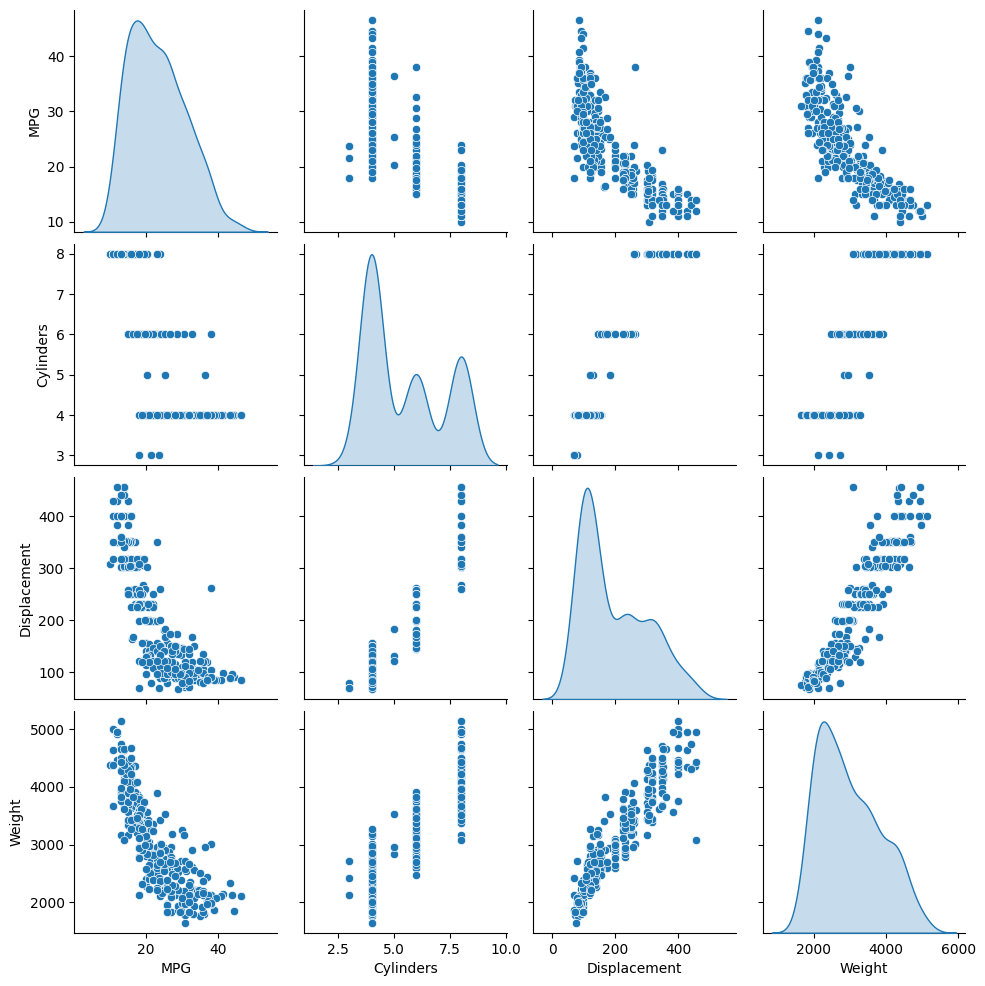

In [27]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind = 'kde')

Yukarıdaki grafiklerde, 'MPG', 'Cylinders', 'Displacement' ve 'Weight' kolonlarının birbiri arasındaki ilişkiyi görmektesiniz.

In [28]:
train_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0


Bu kod, train_dataset'in özet istatistiklerini verir ve bu istatistikleri daha okunabilir bir formatta gösterir. Özellikle çok sayıda sütunu olan veri setlerinde transpoz(.T) işlemi, tüm istatistiklerin bir arada görülmesini kolaylaştırır.

In [29]:
# Veri kumesininin label(etiket) ve value(deger) olarak ayrilmasi
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [30]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
146,4,90.0,75,2125,14.5,74,1
282,4,140.0,88,2890,17.3,79,1
69,8,350.0,160,4456,13.5,72,1
378,4,105.0,63,2125,14.7,82,1
331,4,97.0,67,2145,18.0,80,3
...,...,...,...,...,...,...,...
281,6,200.0,85,2990,18.2,79,1
229,8,400.0,180,4220,11.1,77,1
150,4,108.0,93,2391,15.5,74,3
145,4,83.0,61,2003,19.0,74,3


In [31]:
train_labels

,MPG
146,28.0
282,22.3
69,12.0
378,38.0
331,33.8
...,...
281,19.8
229,16.0
150,26.0
145,32.0


## Normalizasyon
Normalizasyon, veri analitiği ve makine öğrenimi süreçlerinde verilerin daha verimli bir şekilde işlenebilmesi için ölçeklendirilmesi veya standartlaştırılması işlemidir. Bu, verilerin belirli bir aralığa getirilmesini ve her bir özellik veya değişkenin aynı önem düzeyine sahip olmasını sağlar.

In [32]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Origin,1.573248,0.800988


In [33]:
"""
Asagidaki kod ile ilgili kisa bilgiler:
- TensorFlow'un Keras API'sinde kullanılan bir veri normalizasyonu katmanını tanımlar. Bu katman, girdiyi belirli bir eksen (örneğin, özellik sütunları) boyunca normalize eder.
- axis=-1 genellikle son ekseni ifade eder. Bu, genellikle her örneğin özellik sütunları boyunca normalizasyon anlamına gelir. Örneğin, girdi verisi
(örneğin, [num_samples, num_features] şeklinde bir 2D tensör) için, axis=-1 seçimi, her bir örnekteki her bir özelliği normalleştirmek anlamına gelir.
"""
normalizer = tf.keras.layers.Normalization(axis = -1)

In [34]:
normalizer.adapt(np.array(train_features))

In [35]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    1.573]]


In [36]:
first = np.array(train_features[:1])

with np.printoptions(precision = 2, suppress = True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.72]]


Yukarıdaki çıktıda, train_features veri kümesinin ilk satırının normalize edilmemiş ve normalize edilmiş halleri görülmektedir.

#Linear Regression(Doğrusal Regresyon)
**Nedir Linear Regrassion(Doğrusal Regresyon)**

Doğrusal Regresyon, bir bağımlı değişken ile bir veya daha fazla bağımsız değişken arasındaki doğrusal ilişkiyi modelleyen bir yöntemdir. Amaç, bağımsız değişkenlere dayanarak bağımlı değişkenin değerini tahmin etmektir. Bu model, bağımlı değişkenin bir doğru denklemiyle ifade edildiği varsayımına dayanır. Denklemin genel formu:

      y = b0 + b1x1 + b2x2 + ... + bnxn
    
Burada y tahmin edilen deger x1, x2, ... , xn bağımsız değişkenler, b0 sabit terim, b1, b2, ... , bn ise bağımsız değişkenlerin katsayılarıdır. Bu yöntem, özellikle veri analizi ve tahmin yapmada yaygın olarak kullanılır.

Bu kısımdaki çalışmalarımız iki şekilde olacak. Birincisi bir bağımsız değişken ile bağımlı değişkeni tahmin etme, daha sonra birden fazla bağımsız değişken ile bağımlı değişkeni tahmin etme olacaktır.

**Bir bağımsız değişken ile Linear Regression**<br>
Bu kısımda, 'MPG' tahmin edeceğimiz bağımlı değişken olacak, 'Horsepower' ise tek bağımsız değişkenimiz olacak.<br>

Bu bölüm iki adımda gerçekleşecek:

- İlk olarak, 'Horsepower' verilerini normalize edeceğiz(Normalizasyon, verilerin belirli bir aralığa (genellikle 0-1 ya da -1 ile 1 aralığına) ölçeklenmesini sağlar. )

- y = mx + b formülü ile 'MPG' verilerini tahmin edeceğiz.(y = mx + b: Bu, doğrusal regresyonun temel denklemi.)
  - y: Tahmin edilen sonuç (çıktı).
  - m: Eğim (weight - modelin öğrenmeye çalıştığı parametre).
  - x: Girdi verisi ("Horsepower" bu örnekteki girdi).
  - b: Sabit terim (bias)

Not: Linear Regression konusunda daha fazla bilgi sahibi olmak istiyorsanız, lütfen matematiği ile birlikte mantığını da anlayarak öğrenin.

In [37]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape = [1,], axis = None)
horsepower_normalizer.adapt(horsepower)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
"""
Asagidaki modeli 'MPG' verilerini tahminlemede kullanacagiz
"""
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer, # Giriş verilerini normalize eden katman.
    layers.Dense(units = 1) # Tek bir çıkış birimi olan yoğun bağlantılı (dense) katman.
])

horsepower_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [39]:
horsepower_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                         loss = 'mean_absolute_error')

In [40]:
history = horsepower_model.fit(train_features['Horsepower'], # Bagimsiz veri
                               train_labels, # bagimli veri
                               epochs = 100, # Egitim adim sayisi
                               verbose = 0, # Eğitim sırasında konsola hiçbir çıktı yazdırılmaz (sessiz mod).
                               validation_split = 0.2) # Verinin %20'si doğrulama (validation) için ayrılır. Model, doğrulama setindeki performansı da takip eder.

In [41]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,val_loss,epoch
0,22.863998,22.940437,0
1,22.060633,22.140310,1
2,21.260651,21.340237,2
3,20.463554,20.540489,3
4,19.660358,19.740479,4
...,...,...,...
95,3.803478,4.189415,95
96,3.802170,4.189995,96
97,3.802425,4.187684,97
98,3.804673,4.176010,98


In [42]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

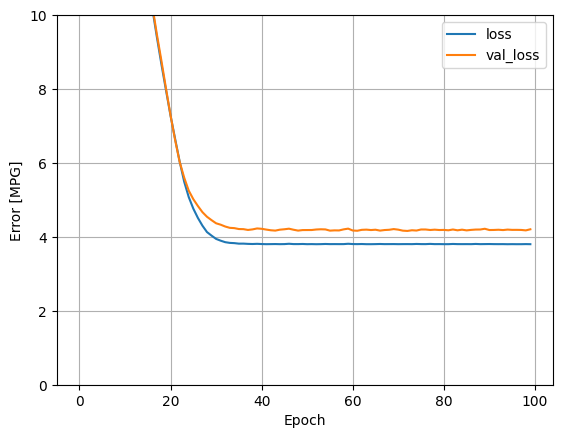

In [43]:
plot_loss(history)

In [44]:
test_result = {}

test_result['horsepower_model'] = horsepower_model.evaluate( # Modeli test verileriyle değerlendirir. Girdi ve hedef değerleri alarak modelin performansını (örneğin, kayıp veya hata oranı) döner.
    test_features['Horsepower'], #  Test setindeki bağımsız değişken (girdi), yani Horsepower sütunu.
    test_labels, # Test setindeki bağımlı değişken (çıktı), modelin tahmin etmeye çalıştığı doğru değerler.
    verbose = 0 # Değerlendirme sırasında konsola hiçbir çıktı yazdırılmaz (sessiz mod).
)

In [45]:
test_result

{'horsepower_model': 3.6460750102996826}

In [46]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [47]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

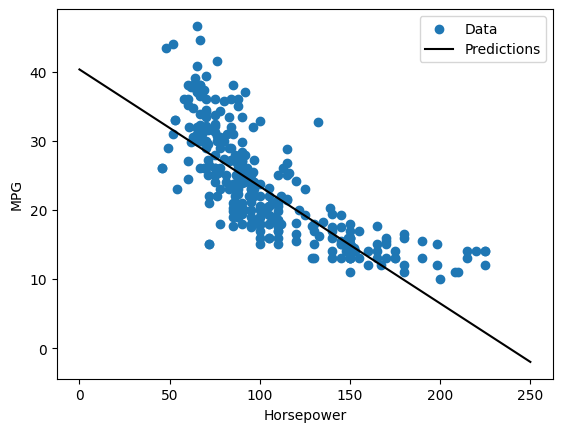

In [48]:
plot_horsepower(x, y)

## Çok Girişli Doğrusal Regresyon
Birden fazla bağımsız değişken ile bağımlı değişkenimizi tahmin edeceğimiz bölüm. Çok girişli doğrusal regresyonun matematiksel formülü ve açıklamaları:

y = b0 + b1x1 + b2x2 + ... + bnxn

y: Tahmin edilen bağımlı değişken (output).<br>
x1, x2, ... , xn: Bağımsız değişkenler (inputlar).<br>
b0: Sabit terim (intercept).<br>
b1, b2, ... ,bn: Bağımsız değişkenlerin katsayıları (eğim).<br>
n: Bağımsız değişkenlerin sayısı.<br>

In [49]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(np.array(train_features))

In [50]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units = 1)
])

In [51]:
linear_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


array([[-0.044],
       [-0.326],
       [ 0.862],
       [ 0.381],
       [-0.648],
       [-0.045],
       [-0.924],
       [-1.011],
       [-0.099],
       [-1.445]], dtype=float32)

In [52]:
linear_model.layers[1].kernel

<KerasVariable shape=(7, 1), dtype=float32, path=sequential_1/dense_1/kernel>

In [53]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [54]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

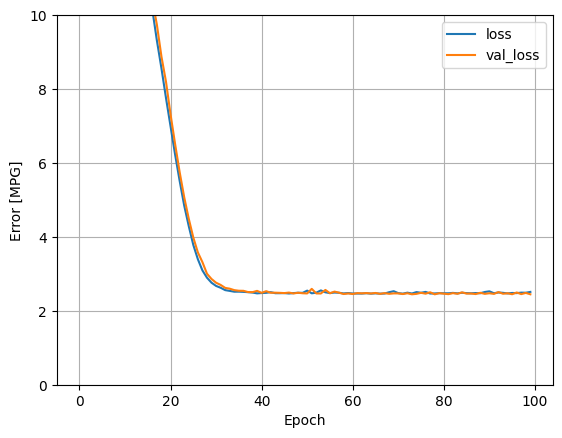

In [55]:
plot_loss(history)

In [56]:
test_result['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# Derin sinir ağları ile Linear Regression.

Bu bölümde sinir ağları oluşturarak elimizdeki verilerle eğitim gerçekleştireceğiz. Yine tek bağımsız değişkenli ve çok bağımsız değişkenli veri setleri ile eğitim yapacağız.

In [57]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm, # Normalizasyon katmani
      layers.Dense(64, activation = 'relu'),
      layers.Dense(64, activation = 'relu'), # İki adet 64 nöronlu gizli katman, ReLU aktivasyon fonksiyonu ile kullanılır.
      layers.Dense(1) #  Tek nöronlu çıkış katmanı, regresyon problemi için kullanılan bir yapı.
  ])

  model.compile(loss = 'mean_absolute_error',
                optimizer = tf.keras.optimizers.Adam(0.001))
  return model

## Bir bağımsız değişken ile Linear Regression

In [58]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [59]:
dnn_horsepower_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [60]:
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

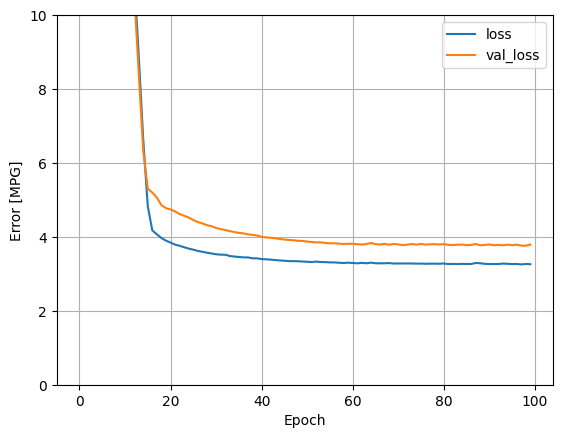

In [61]:
plot_loss(history)

In [62]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


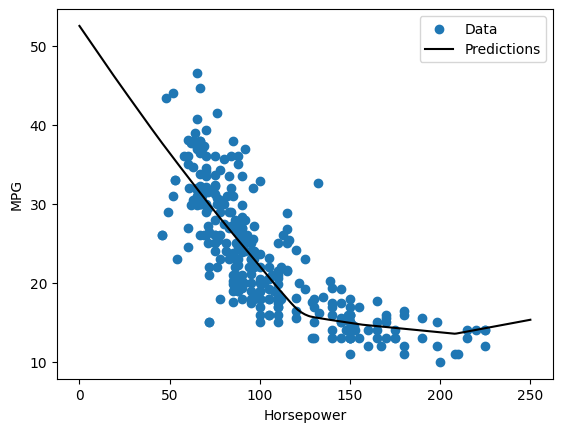

In [63]:
plot_horsepower(x, y)

In [64]:
test_result['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

## Çok Girişli Doğrusal Regresyon

In [65]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (10, 7)                     │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (64.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 15 (64.00 B)

In [66]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

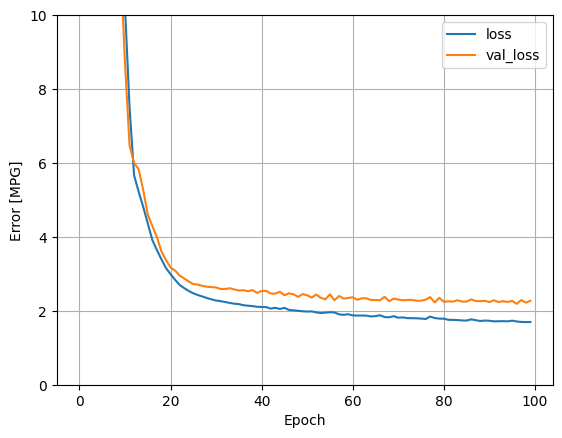

In [67]:
plot_loss(history)

In [68]:
test_result['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [69]:
pd.DataFrame(test_result, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.646075
linear_model,2.452067
dnn_horsepower_model,2.913077
dnn_model,1.757565


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


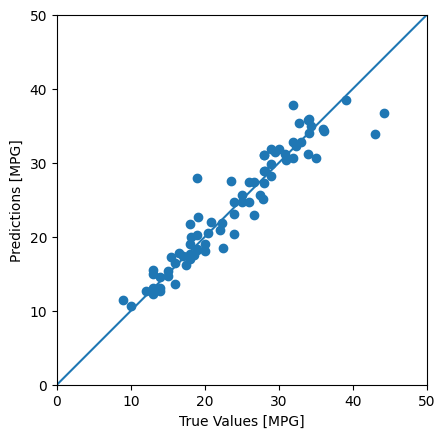

In [70]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

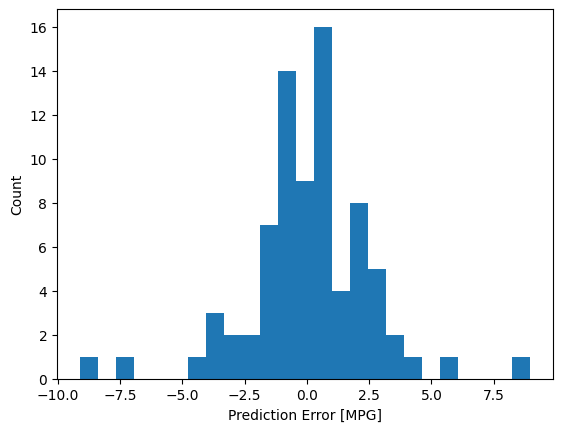

In [71]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [72]:
dnn_model.save('dnn_model.keras')

In [73]:
reloaded = tf.keras.models.load_model('dnn_model.keras')

test_result['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [74]:
pd.DataFrame(test_result, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.646075
linear_model,2.452067
dnn_horsepower_model,2.913077
dnn_model,1.757565
reloaded,1.757565


# Sonuc

Tensorflow 2 üzerindeki çalışmamızın 'Basic Regression: Predoct fuel efficiency' çalışmasınıda bitirmiş bulunmaktayız. Bu calisma basic regressin projesi uzerinde calismalarimizi bitirdik. Umarim calismam sizlere faydali olmustur. Iyi gunler iyi calismalar dilerim.

Aşağıdaki Linklerden beni takip edebilir ve yapacağım çalışmalardan haberdar olabilirsiniz!<br>
[Linkedin](https://www.linkedin.com/in/ihsancenkiz/)<br>
[Github](https://github.com/ihsncnkz)<br>
[Kaggle](https://www.kaggle.com/ihsncnkz)